In [259]:
#Imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
#import alpaca_trade_api as tradeapi
import numpy as np
import pytz
from fredapi import Fred
import seaborn as sns
import panel as pn
import plotly.express as px
import datetime
import hvplot.pandas
import holoviews as hv
from holoviews import opts
pn.extension('plotly')
#import pycmap
#from matplotlib import cm

%matplotlib inline

In [260]:
load_dotenv()

True

In [261]:
api_key = os.getenv("FRED_API_KEY")

In [262]:
type(api_key)

str

In [263]:
fred = Fred(api_key)

In [264]:
#realtime_start = "1980-01-01"
#realtime_end = "2021-07-31"

In [265]:
# Corporate Bond data set
bond_data = fred.get_series("AAA")
bond_data.dropna(inplace=True)
bond_data.head(10)

1919-01-01    5.35
1919-02-01    5.35
1919-03-01    5.39
1919-04-01    5.44
1919-05-01    5.39
1919-06-01    5.40
1919-07-01    5.44
1919-08-01    5.56
1919-09-01    5.60
1919-10-01    5.54
dtype: float64

In [266]:
# Money Supply data set
m2sl_data = fred.get_series("M2SL")
m2sl_data.dropna(inplace=True)
#m2sl_data.drop(columns=['Unnamed: 0'], inplace=True)
#m2sl_data.isnull()
m2sl_data.head(10)

1959-01-01    286.6
1959-02-01    287.7
1959-03-01    289.2
1959-04-01    290.1
1959-05-01    292.2
1959-06-01    294.1
1959-07-01    295.2
1959-08-01    296.4
1959-09-01    296.7
1959-10-01    296.5
dtype: float64

In [267]:
# S&P 500 data set
#sp500_data = fred.get_series("SP500")
#sp500_data.dropna(inplace=True)
#sp500_data.head(10)

In [268]:
# GDP data set
gdp_data = fred.get_series("GDPC1")
gdp_data.dropna(inplace=True)
gdp_data.sort_index(inplace=True,)
gdp_data.head(10)

1947-01-01    2034.450
1947-04-01    2029.024
1947-07-01    2024.834
1947-10-01    2056.508
1948-01-01    2087.442
1948-04-01    2121.899
1948-07-01    2134.056
1948-10-01    2136.440
1949-01-01    2107.001
1949-04-01    2099.814
dtype: float64

In [269]:
# Initializing percentage change variables for each data set
gdp_change = gdp_data.pct_change()
sp500_change = sp500_data.pct_change()
m2sl_change = m2sl_data.pct_change()
bond_change = bond_data.pct_change()

In [270]:
# Concatinating the individual data sets into one Dataframe
m2_df = pd.concat([m2sl_data, gdp_data, bond_data], axis="columns", join="inner")
m2_df["1980-01-01" : "2021-07-31"]
#m2_df = pd.DataFrame({"M2SL": [m2sl_data], "S&P 500": [sp500_data], "GDP": [gdp_data]})
m2_df.sort_index(inplace=True,)
m2_df.rename(columns = {0 : "M2SL", 1 : "GDP" , 2 : "Corporate Bonds", }, inplace=True)
m2_df.head(20)

,M2SL,GDP,Corporate Bonds
1959-01-01,286.6,3123.978,4.12
1959-04-01,290.1,3194.429,4.23
1959-07-01,295.2,3196.683,4.47
1959-10-01,296.5,3205.790,4.57
1960-01-01,298.2,3277.847,4.61
1960-04-01,300.1,3260.177,4.45
1960-07-01,304.1,3276.133,4.41
1960-10-01,309.5,3234.087,4.30
1961-01-01,314.1,3255.914,4.32
1961-04-01,319.9,3311.181,4.25


In [271]:
# Creating a percentage change Dataframe of each data set
m2_change_df = pd.concat([m2sl_change, bond_change, gdp_change, sp500_change], axis="columns", join="inner")
m2_change_df["1980-01-01" : "2021-07-31"]
#m2_df = pd.DataFrame({"M2SL": [m2sl_data], "S&P 500": [sp500_data], "GDP": [gdp_data]})
m2_change_df.sort_index(inplace=True,)
m2_change_df.rename(columns = {0 : "M2SL", 1 : "Corporate Bonds", 2 : "GDP", 3 : "S&P 500"}, inplace=True)
m2_change_df.head(20)

,M2SL,Corporate Bonds,GDP,S&P 500
2012-10-01,0.006217,-0.005731,0.001098,0.002652
2013-04-01,0.003258,-0.050891,0.001394,-0.004474
2013-07-01,0.004342,0.016393,0.007917,0.005404
2013-10-01,0.010472,-0.023707,0.007112,0.007999
2014-04-01,0.004665,-0.031963,0.012841,0.007039
2014-07-01,0.005009,-0.021176,0.011650,0.006678
2014-10-01,0.005383,-0.046229,0.004490,-0.013249
2015-04-01,0.003305,-0.032967,0.005800,-0.003965
2015-07-01,0.004114,-0.009547,0.003234,0.006936
2015-10-01,0.003117,-0.029484,0.001462,0.001974


In [272]:
bond_m2_df = pd.concat([m2sl_data, bond_data], axis="columns", join="inner")
bond_m2_df["1980-01-01" : "2021-07-31"]
#m2_df = pd.DataFrame({"M2SL": [m2sl_data], "S&P 500": [sp500_data], "GDP": [gdp_data]})
bond_m2_df.sort_index(inplace=True,)
bond_m2_df.rename(columns = {0 : "M2SL", 1 : "Corporate Bonds"}, inplace=True)
bond_m2_df.head(20)

,M2SL,Corporate Bonds
1959-01-01,286.6,4.12
1959-02-01,287.7,4.14
1959-03-01,289.2,4.13
1959-04-01,290.1,4.23
1959-05-01,292.2,4.37
1959-06-01,294.1,4.46
1959-07-01,295.2,4.47
1959-08-01,296.4,4.43
1959-09-01,296.7,4.52
1959-10-01,296.5,4.57


In [273]:
# Checking the percentage change data frame
m2_change_df.dtypes

M2SL               float64
Corporate Bonds    float64
GDP                float64
S&P 500            float64
dtype: object

In [274]:
# Checking the concatenated data frame
m2_df.dtypes

M2SL               float64
GDP                float64
Corporate Bonds    float64
dtype: object

In [275]:
m2_df.isnull().sum()

M2SL               0
GDP                0
Corporate Bonds    0
dtype: int64

In [316]:
bond_m2_change_df = pd.concat([m2sl_change, bond_change], axis="columns", join="inner")
bond_m2_change_df["1980-01-01" : "2021-07-31"]
bond_m2_change_df.sort_index(inplace=True,)
bond_m2_change_df.rename(columns = {0 : "M2SL", 1 : "Corporate Bonds"}, inplace=True)
bond_m2_change_df.head(20)

,M2SL,Corporate Bonds
1959-01-01,NaN,0.009804
1959-02-01,0.003838,0.004854
1959-03-01,0.005214,-0.002415
1959-04-01,0.003112,0.024213
1959-05-01,0.007239,0.033097
1959-06-01,0.006502,0.020595
1959-07-01,0.003740,0.002242
1959-08-01,0.004065,-0.008949
1959-09-01,0.001012,0.020316
1959-10-01,-0.000674,0.011062


In [277]:
bond_m2_corr = bond_m2_df.corr()

## Overall Heatmap

[Text(0, 0.5, 'M2SL'), Text(0, 1.5, 'Corporate Bonds')]

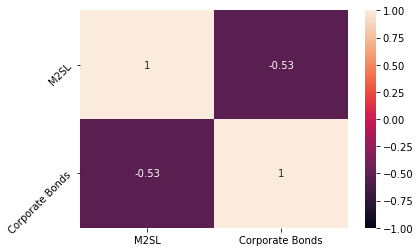

In [278]:
corr_chart = sns.heatmap(bond_m2_corr, annot=True, vmin=-1, vmax=1)
#corr_chart = sns.heatmap(bond_m2_df, annot=True, vmin=-1, vmax=1)
#corr_chart = sns.heatmap(bond_data[:, np.newaxis], cmap=ListedColormap(['green', 'yellow', 'red']))
corr_chart.set_yticklabels(corr_chart.get_yticklabels(), rotation = 45)

## Z Score Calculation for Bond Data and Money Supply

In [279]:
zScore_df = m2_df.copy(deep=True)
zScore_df.head(10)

,M2SL,GDP,Corporate Bonds
1959-01-01,286.6,3123.978,4.12
1959-04-01,290.1,3194.429,4.23
1959-07-01,295.2,3196.683,4.47
1959-10-01,296.5,3205.790,4.57
1960-01-01,298.2,3277.847,4.61
1960-04-01,300.1,3260.177,4.45
1960-07-01,304.1,3276.133,4.41
1960-10-01,309.5,3234.087,4.30
1961-01-01,314.1,3255.914,4.32
1961-04-01,319.9,3311.181,4.25


In [280]:
zScore_df['GDP Z Score'] = (zScore_df['GDP'] - zScore_df['GDP'].mean()) / zScore_df['GDP'].std()
zScore_df.head(10)

,M2SL,GDP,Corporate Bonds,GDP Z Score
1959-01-01,286.6,3123.978,4.12,-1.418739
1959-04-01,290.1,3194.429,4.23,-1.404418
1959-07-01,295.2,3196.683,4.47,-1.403960
1959-10-01,296.5,3205.790,4.57,-1.402109
1960-01-01,298.2,3277.847,4.61,-1.387462
1960-04-01,300.1,3260.177,4.45,-1.391054
1960-07-01,304.1,3276.133,4.41,-1.387811
1960-10-01,309.5,3234.087,4.30,-1.396357
1961-01-01,314.1,3255.914,4.32,-1.391921
1961-04-01,319.9,3311.181,4.25,-1.380687


In [281]:
zScore_df['M2 Z Score'] = (zScore_df['M2SL'] - zScore_df['M2SL'].mean()) / zScore_df['M2SL'].std()
zScore_df.head(10)

,M2SL,GDP,Corporate Bonds,GDP Z Score,M2 Z Score
1959-01-01,286.6,3123.978,4.12,-1.418739,-0.941348
1959-04-01,290.1,3194.429,4.23,-1.404418,-0.940570
1959-07-01,295.2,3196.683,4.47,-1.403960,-0.939436
1959-10-01,296.5,3205.790,4.57,-1.402109,-0.939147
1960-01-01,298.2,3277.847,4.61,-1.387462,-0.938769
1960-04-01,300.1,3260.177,4.45,-1.391054,-0.938347
1960-07-01,304.1,3276.133,4.41,-1.387811,-0.937458
1960-10-01,309.5,3234.087,4.30,-1.396357,-0.936258
1961-01-01,314.1,3255.914,4.32,-1.391921,-0.935235
1961-04-01,319.9,3311.181,4.25,-1.380687,-0.933946


In [282]:
zScore_df['Bond Z Score'] = (zScore_df['Corporate Bonds'] - zScore_df['Corporate Bonds'].mean()) / zScore_df["Corporate Bonds"].std()
zScore_df.head(10)

,M2SL,GDP,Corporate Bonds,GDP Z Score,M2 Z Score,Bond Z Score
1959-01-01,286.6,3123.978,4.12,-1.418739,-0.941348,-1.030643
1959-04-01,290.1,3194.429,4.23,-1.404418,-0.940570,-0.989917
1959-07-01,295.2,3196.683,4.47,-1.403960,-0.939436,-0.901061
1959-10-01,296.5,3205.790,4.57,-1.402109,-0.939147,-0.864037
1960-01-01,298.2,3277.847,4.61,-1.387462,-0.938769,-0.849228
1960-04-01,300.1,3260.177,4.45,-1.391054,-0.938347,-0.908466
1960-07-01,304.1,3276.133,4.41,-1.387811,-0.937458,-0.923275
1960-10-01,309.5,3234.087,4.30,-1.396357,-0.936258,-0.964001
1961-01-01,314.1,3255.914,4.32,-1.391921,-0.935235,-0.956596
1961-04-01,319.9,3311.181,4.25,-1.380687,-0.933946,-0.982512


In [283]:
zScore_df.drop(columns = ['M2SL', 'GDP', 'Corporate Bonds',], inplace = True)
zScore_df.head(10)

,GDP Z Score,M2 Z Score,Bond Z Score
1959-01-01,-1.418739,-0.941348,-1.030643
1959-04-01,-1.404418,-0.940570,-0.989917
1959-07-01,-1.403960,-0.939436,-0.901061
1959-10-01,-1.402109,-0.939147,-0.864037
1960-01-01,-1.387462,-0.938769,-0.849228
1960-04-01,-1.391054,-0.938347,-0.908466
1960-07-01,-1.387811,-0.937458,-0.923275
1960-10-01,-1.396357,-0.936258,-0.964001
1961-01-01,-1.391921,-0.935235,-0.956596
1961-04-01,-1.380687,-0.933946,-0.982512


## Z Score Line Plot

In [284]:
bond_zscore_change_plot = zScore_df.hvplot(width=1000, height=500) * pandemic_marker * hv.Text(datetime.datetime(2020, 1, 1), .21000, "Global Pandemic", halign='center') * \
financialCrisis_marker * hv.Text(datetime.datetime(2007, 6, 1), .19500, "Financial Crisis", halign='center') * \
september11_marker * hv.Text(datetime.datetime(2001, 9, 11), .18000, "Sept. 11 ", halign='right') * \
financial_crisis_1980_marker * hv.Text(datetime.datetime(1981, 7, 1), .14000, " 1980s Financial Crisis",halign='left')
bond_zscore_change_plot 

:Overlay
   .NdOverlay.I :NdOverlay   [Variable]
      :Curve   [index]   (value)
   .VSpan.I     :VSpan   [x,y]
   .Text.I      :Text   [x,y]
   .VSpan.II    :VSpan   [x,y]
   .Text.II     :Text   [x,y]
   .VLine.I     :VLine   [x,y]
   .Text.III    :Text   [x,y]
   .VSpan.III   :VSpan   [x,y]
   .Text.IV     :Text   [x,y]

## Initialize Rolling Z Score

In [297]:
rolling_zScore_df = m2_df.copy(deep=True)
rolling_zScore_df.head(10)

,M2SL,GDP,Corporate Bonds
1959-01-01,286.6,3123.978,4.12
1959-04-01,290.1,3194.429,4.23
1959-07-01,295.2,3196.683,4.47
1959-10-01,296.5,3205.790,4.57
1960-01-01,298.2,3277.847,4.61
1960-04-01,300.1,3260.177,4.45
1960-07-01,304.1,3276.133,4.41
1960-10-01,309.5,3234.087,4.30
1961-01-01,314.1,3255.914,4.32
1961-04-01,319.9,3311.181,4.25


In [298]:
rolling_zScore_df['Rolling GDP Z Score'] = \
(rolling_zScore_df['GDP'] - rolling_zScore_df['GDP'].rolling(window=36).mean()) / rolling_zScore_df['GDP'].rolling(window=36).std()
rolling_zScore_df.head()
rolling_zScore_df['Rolling M2 Z Score'] = \
(rolling_zScore_df['M2SL'] - rolling_zScore_df['M2SL'].rolling(window=36).mean()) / rolling_zScore_df['M2SL'].rolling(window=36).std()
rolling_zScore_df.head()
rolling_zScore_df['Rolling Bond Z Score'] = \
(rolling_zScore_df['Corporate Bonds'] - rolling_zScore_df['Corporate Bonds'].rolling(window=36).mean()) / rolling_zScore_df['Corporate Bonds'].rolling(window=36).std()
rolling_zScore_df.drop(columns = ['M2SL', 'GDP', 'Corporate Bonds'], inplace = True)
rolling_zScore_df.head(100)

,Rolling GDP Z Score,Rolling M2 Z Score,Rolling Bond Z Score
1959-01-01,NaN,NaN,NaN
1959-04-01,NaN,NaN,NaN
1959-07-01,NaN,NaN,NaN
1959-10-01,NaN,NaN,NaN
1960-01-01,NaN,NaN,NaN
1960-04-01,NaN,NaN,NaN
1960-07-01,NaN,NaN,NaN
1960-10-01,NaN,NaN,NaN
1961-01-01,NaN,NaN,NaN
1961-04-01,NaN,NaN,NaN


In [319]:
bond_zscore_rolling_plot = rolling_zScore_df.hvplot(width=1000, height=500) * pandemic_marker * hv.Text(datetime.datetime(2020, 1, 1), .21000, "Global Pandemic", halign='center') * \
financialCrisis_marker * hv.Text(datetime.datetime(2007, 6, 1), .19500, "'08 Financial Crisis", halign='center') * \
september11_marker * hv.Text(datetime.datetime(2001, 9, 11), .18000, "Sept. 11 ", halign='right') * \
financial_crisis_1980_marker * hv.Text(datetime.datetime(1981, 7, 1), .14000, " 1980s Financial Crisis",halign='left')
bond_zscore_rolling_plot

:Overlay
   .NdOverlay.I :NdOverlay   [Variable]
      :Curve   [index]   (value)
   .VSpan.I     :VSpan   [x,y]
   .Text.I      :Text   [x,y]
   .VSpan.II    :VSpan   [x,y]
   .Text.II     :Text   [x,y]
   .VLine.I     :VLine   [x,y]
   .Text.III    :Text   [x,y]
   .VSpan.III   :VSpan   [x,y]
   .Text.IV     :Text   [x,y]

## Overall Line Plot For Bond Data and Money Supply Data

### Set Line Markers for Important Dates

In [288]:
# Setting line markers for use on the overall line plots
pandemic_marker = hv.VSpan(datetime.datetime(2020, 1, 1),datetime.datetime(2020, 7, 31)).options(color='gray')
financialCrisis_marker = hv.VSpan(datetime.datetime(2007, 6, 1),datetime.datetime(2009, 12, 31)).options(color='gray')
september11_marker = hv.VLine(datetime.datetime(2001, 9, 11)).options(color='gray')
financial_crisis_1980_marker = hv.VSpan(datetime.datetime(1981, 7, 1), datetime.datetime(1982, 11, 1)).options(color='gray')

## Bond Percent Change Data Line Plot

In [289]:
bond_change_plot = bond_data.hvplot(width=1000, height=500) * pandemic_marker * hv.Text(datetime.datetime(2020, 1, 1), .21000, "Global Pandemic", halign='right') * \
financialCrisis_marker * hv.Text(datetime.datetime(2007, 6, 1), .19500, "Financial Crisis", halign='center') * \
september11_marker * hv.Text(datetime.datetime(2001, 9, 11), .18000, "Sept. 11 ", halign='right') * \
financial_crisis_1980_marker * hv.Text(datetime.datetime(1981, 7, 1), .14000, " 1980s Financial Crisis",halign='right')
bond_change_plot

:Overlay
   .Curve.A_0 :Curve   [index]   (0)
   .VSpan.I   :VSpan   [x,y]
   .Text.I    :Text   [x,y]
   .VSpan.II  :VSpan   [x,y]
   .Text.II   :Text   [x,y]
   .VLine.I   :VLine   [x,y]
   .Text.III  :Text   [x,y]
   .VSpan.III :VSpan   [x,y]
   .Text.IV   :Text   [x,y]

## M2 Percent Change Line Plot

In [305]:
m2_change_plot = m2sl_data.hvplot(width=1000, height=500) * pandemic_marker * hv.Text(datetime.datetime(2020, 1, 1), .21000, "Global Pandemic", halign='center') * \
financialCrisis_marker * hv.Text(datetime.datetime(2007, 6, 1), .19500, "Financial Crisis", halign='center') * \
september11_marker * hv.Text(datetime.datetime(2001, 9, 11), .18000, "Sept. 11 ", halign='right') * \
financial_crisis_1980_marker * hv.Text(datetime.datetime(1981, 7, 1), .14000, " 1980s Financial Crisis",halign='left')
m2_change_plot

:Overlay
   .Curve.A_0 :Curve   [index]   (0)
   .VSpan.I   :VSpan   [x,y]
   .Text.I    :Text   [x,y]
   .VSpan.II  :VSpan   [x,y]
   .Text.II   :Text   [x,y]
   .VLine.I   :VLine   [x,y]
   .Text.III  :Text   [x,y]
   .VSpan.III :VSpan   [x,y]
   .Text.IV   :Text   [x,y]

## Overall Scatter for Bond Data VS. Money Supply Data

In [306]:
bond_m2_change_df
bond_m2_change_df.hvplot.scatter(
        x="M2SL",
        y="Corporate Bonds",
        c="black",
        #c="yellow",
        colormap="spring",
        title="Bonds VS. Money Supply",
    )

:Scatter   [M2SL]   (Corporate Bonds)

## Z Score Line Plot showing timeframe starting on: 9/11/2001

In [317]:
bond_change_911 = zScore_df.hvplot(width=1000, height=500) * \
september11_marker * hv.Text(datetime.datetime(2001, 9, 11), .18000, "Sept. 11 ", halign='right')
bond_change_911

:Overlay
   .NdOverlay.I :NdOverlay   [Variable]
      :Curve   [index]   (value)
   .VLine.I     :VLine   [x,y]
   .Text.I      :Text   [x,y]

## Heatmap showing timeframe starting on: 9/11/2001

### Set timeframe for 9/11

In [376]:
corr_nine_eleven = m2_df["2001-01-01" : "2002-01-01"]
corr_nine_eleven.head(5)

,M2SL,GDP,Corporate Bonds
2001-01-01,4975.8,13219.251,7.15
2001-04-01,5135.9,13301.394,7.20
2001-07-01,5203.2,13248.142,7.13
2001-10-01,5336.8,13284.881,7.03
2002-01-01,5453.9,13394.910,6.55


In [377]:
corr_chart_nine_eleven = corr_nine_eleven.corr()

[Text(0, 0.5, 'M2SL'), Text(0, 1.5, 'GDP'), Text(0, 2.5, 'Corporate Bonds')]

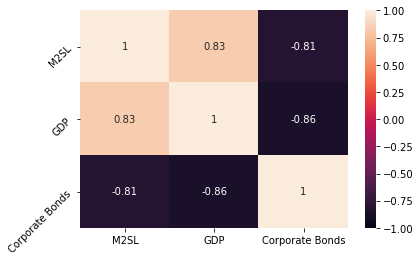

In [378]:
corr_chart_nine_eleven = sns.heatmap(corr_chart_nine_eleven, annot=True, vmin=-1, vmax=1)
#corr_chart = sns.heatmap(bond_m2_df, annot=True, vmin=-1, vmax=1)
#corr_chart = sns.heatmap(bond_data[:, np.newaxis], cmap=ListedColormap(['green', 'yellow', 'red']))
corr_chart_nine_eleven.set_yticklabels(corr_chart_nine_eleven.get_yticklabels(), rotation = 45)

## Heatmap showing timeframe for the 2008 Market Crash

### Set timeframe for 2008 crash

In [369]:
corr_oh_eight = m2_df["2008-01-01" : "2009-01-01"]
corr_oh_eight

,M2SL,GDP,Corporate Bonds
2008-01-01,7504.8,15702.906,5.33
2008-04-01,7698.2,15792.773,5.55
2008-07-01,7774.2,15709.562,5.67
2008-10-01,7967.2,15366.607,6.28
2009-01-01,8275.3,15187.475,5.05


In [370]:
corr_chart_oh_eight = corr_oh_eight.corr()
corr_chart_oh_eight

,M2SL,GDP,Corporate Bonds
M2SL,1.000000,-0.907473,-0.110718
GDP,-0.907473,1.000000,0.068112
Corporate Bonds,-0.110718,0.068112,1.000000


[Text(0, 0.5, 'M2SL'), Text(0, 1.5, 'GDP'), Text(0, 2.5, 'Corporate Bonds')]

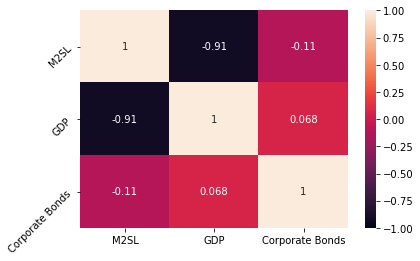

In [371]:
corr_chart_oh_eight = sns.heatmap(corr_chart_oh_eight, annot=True, vmin=-1, vmax=1)
#corr_chart = sns.heatmap(bond_m2_df, annot=True, vmin=-1, vmax=1)
#corr_chart = sns.heatmap(bond_data[:, np.newaxis], cmap=ListedColormap(['green', 'yellow', 'red']))
corr_chart_oh_eight.set_yticklabels(corr_chart_oh_eight.get_yticklabels(), rotation = 45)

## Heatmap showing timeframe for the 2021 Global Pandemic

In [366]:
corr_covid = m2_df["2020-01-01" : "2021-07-31"]
corr_covid

,M2SL,GDP,Corporate Bonds
2020-01-01,15410.0,18951.992,2.94
2020-04-01,17042.9,17258.205,2.43
2020-07-01,18320.0,18560.774,2.14
2020-10-01,18751.1,18767.778,2.35
2021-01-01,19396.5,19055.655,2.45
2021-04-01,20119.9,19358.176,2.90


In [367]:
corr_chart_covid = corr_covid.corr()
corr_chart_covid

,M2SL,GDP,Corporate Bonds
M2SL,1.000000,0.424446,-0.205944
GDP,0.424446,1.000000,0.431675
Corporate Bonds,-0.205944,0.431675,1.000000


[Text(0, 0.5, 'M2SL'), Text(0, 1.5, 'GDP'), Text(0, 2.5, 'Corporate Bonds')]

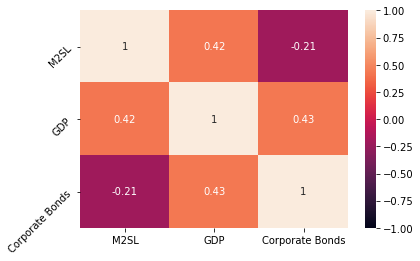

In [368]:
corr_chart_covid = sns.heatmap(corr_chart_covid, annot=True, vmin=-1, vmax=1)
#corr_chart = sns.heatmap(bond_m2_df, annot=True, vmin=-1, vmax=1)
#corr_chart = sns.heatmap(bond_data[:, np.newaxis], cmap=ListedColormap(['green', 'yellow', 'red']))
corr_chart_covid.set_yticklabels(corr_chart_covid.get_yticklabels(), rotation = 45)

# Set Z Score Correlation Variables

In [318]:
zScore_corr_chart = zScore_df.corr()
zScore_corr_chart

,GDP Z Score,M2 Z Score,Bond Z Score
GDP Z Score,1.000000,0.933843,-0.415742
M2 Z Score,0.933843,1.000000,-0.528304
Bond Z Score,-0.415742,-0.528304,1.000000


In [344]:
zScore_corr_oh_eight = zScore_df["2008-01-01" : "2009-01-01"]
zScore_corr_oh_eight

,GDP Z Score,M2 Z Score,Bond Z Score
2008-01-01,1.138141,0.663183,-0.582660
2008-04-01,1.156408,0.706173,-0.501208
2008-07-01,1.139494,0.723067,-0.456780
2008-10-01,1.069783,0.765969,-0.230937
2009-01-01,1.033371,0.834457,-0.686325


In [349]:
zScore_corr_oh_eight_chart = zScore_corr_oh_eight.corr()
zScore_corr_oh_eight_chart

,GDP Z Score,M2 Z Score,Bond Z Score
GDP Z Score,1.000000,-0.907473,0.068112
M2 Z Score,-0.907473,1.000000,-0.110718
Bond Z Score,0.068112,-0.110718,1.000000


In [345]:
zScore_corr_nine_eleven = zScore_df["2001-09-01" : "2002-09-01"]
zScore_corr_nine_eleven

,GDP Z Score,M2 Z Score,Bond Z Score
2001-10-01,0.646637,0.181259,0.046738
2002-01-01,0.669002,0.207289,-0.130974
2002-04-01,0.685761,0.216536,-0.053225
2002-07-01,0.696815,0.237365,-0.138379


In [351]:
zScore_corr_nine_eleven_chart = zScore_corr_nine_eleven.corr()
zScore_corr_nine_eleven_chart

,GDP Z Score,M2 Z Score,Bond Z Score
GDP Z Score,1.000000,0.983908,-0.753110
M2 Z Score,0.983908,1.000000,-0.823371
Bond Z Score,-0.753110,-0.823371,1.000000


In [346]:
zScore_corr_covid = zScore_df["2020-01-01" : "2021-07-31"]
zScore_corr_covid

,GDP Z Score,M2 Z Score,Bond Z Score
2020-01-01,1.798573,2.420426,-1.467519
2020-04-01,1.454282,2.783403,-1.656338
2020-07-01,1.719051,3.067289,-1.763706
2020-10-01,1.761129,3.163118,-1.685957
2021-01-01,1.819644,3.306584,-1.648934
2021-04-01,1.881137,3.467388,-1.482328


In [353]:
zScore_corr_covid_chart = zScore_corr_covid.corr()
zScore_corr_covid_chart

,GDP Z Score,M2 Z Score,Bond Z Score
GDP Z Score,1.000000,0.424446,0.431675
M2 Z Score,0.424446,1.000000,-0.205944
Bond Z Score,0.431675,-0.205944,1.000000


## Z Score Correlation Heatmap: 2008's Financial Crisis

[Text(0, 0.5, 'GDP Z Score'),
 Text(0, 1.5, 'M2 Z Score'),
 Text(0, 2.5, 'Bond Z Score')]

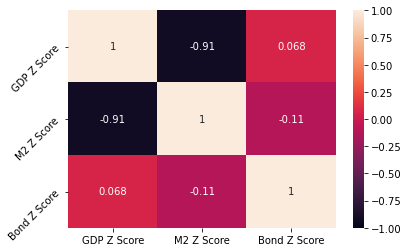

In [354]:
zScore_corr_oh_eight_chart = sns.heatmap(zScore_corr_oh_eight_chart, annot=True, vmin=-1, vmax=1)
#corr_chart = sns.heatmap(bond_m2_df, annot=True, vmin=-1, vmax=1)
#corr_chart = sns.heatmap(bond_data[:, np.newaxis], cmap=ListedColormap(['green', 'yellow', 'red']))
zScore_corr_oh_eight_chart.set_yticklabels(zScore_corr_oh_eight_chart.get_yticklabels(), rotation = 45)

## Z Score Correlation Heatmap: 9/11

[Text(0, 0.5, 'GDP Z Score'),
 Text(0, 1.5, 'M2 Z Score'),
 Text(0, 2.5, 'Bond Z Score')]

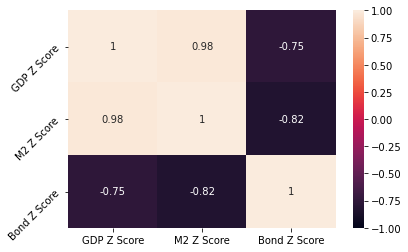

In [355]:
zScore_corr_nine_eleven_chart = sns.heatmap(zScore_corr_nine_eleven_chart, annot=True, vmin=-1, vmax=1)
#corr_chart = sns.heatmap(bond_m2_df, annot=True, vmin=-1, vmax=1)
#corr_chart = sns.heatmap(bond_data[:, np.newaxis], cmap=ListedColormap(['green', 'yellow', 'red']))
zScore_corr_nine_eleven_chart.set_yticklabels(zScore_corr_nine_eleven_chart.get_yticklabels(), rotation = 45)

## Z Score Correlation Heatmap: 2021 Global Pandemic

[Text(0, 0.5, 'GDP Z Score'),
 Text(0, 1.5, 'M2 Z Score'),
 Text(0, 2.5, 'Bond Z Score')]

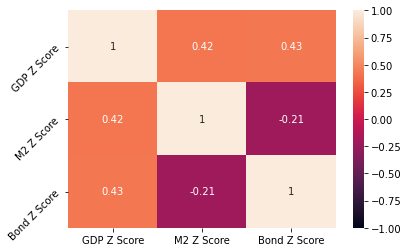

In [356]:
zScore_corr_covid_chart = sns.heatmap(zScore_corr_covid_chart, annot=True, vmin=-1, vmax=1)
#corr_chart = sns.heatmap(bond_m2_df, annot=True, vmin=-1, vmax=1)
#corr_chart = sns.heatmap(bond_data[:, np.newaxis], cmap=ListedColormap(['green', 'yellow', 'red']))
zScore_corr_covid_chart.set_yticklabels(zScore_corr_covid_chart.get_yticklabels(), rotation = 45)

# Converting Dataframes into CSV files

In [384]:
zScore_df.to_csv(r'Resources/zScore_df.csv', index = False, header=True)

In [385]:
rolling_zScore_df.to_csv(r'Resources/rolling_zScore_df.csv', index = False, header=True)

In [386]:
m2_df.to_csv(r'Resources/m2_df.csv', index = False, header=True)

In [383]:
m2_change_df.to_csv(r'Resources/m2_change_df.csv', index = False, header=True)